#### Explicit or Forward Euler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [14]:
# y'
def f(y):
    return -0.5 * y

In [18]:
def Euler(f, t0, y0, tmax, dt):
    n = int((tmax - t0)/dt) + 1
    t = np.arange(t0, tmax+dt, dt)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i] + dt * f(y[i])
        # 요거 보다, y[i] + dt * f(y[i])

    return t, y

In [19]:
t1, y1 = Euler(f, t0 = 0, y0=1, tmax=10, dt=1)
t2, y2 = Euler(f, t0 = 0, y0=1, tmax=10, dt=0.5)
t3, y3 = Euler(f, t0 = 0, y0=1, tmax=10, dt=0.25)

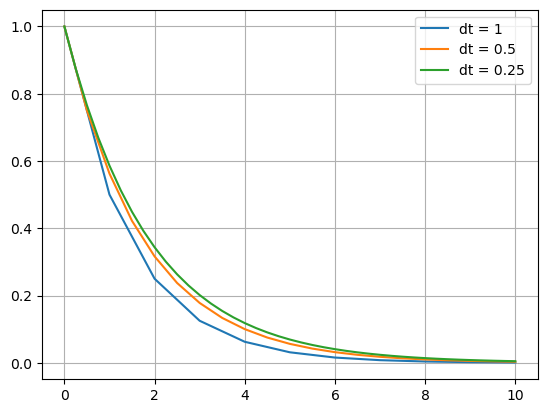

In [20]:
plt.plot(t1, y1, label = 'dt = 1')
plt.plot(t2, y2, label = 'dt = 0.5')
plt.plot(t3, y3, label = 'dt = 0.25')
plt.legend()
plt.grid()

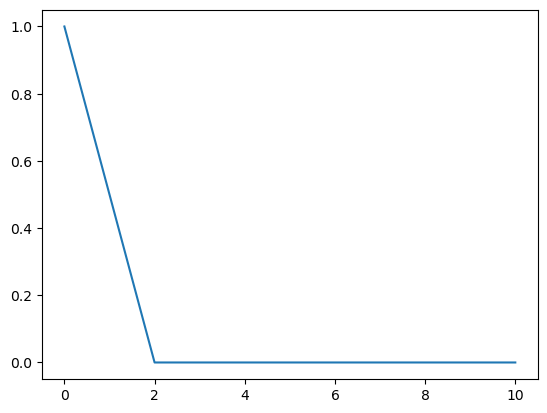

In [42]:
# unstable한 영역
t4, y4 = Euler(f, t0=0, y0=1, tmax=10, dt=2)
plt.plot(t4, y4, label = 'dt = 4')

#### Implicit Euler (Backward)

In [35]:
def Euler_back(t0, y0, tmax, dt):
    n = int((tmax - t0)/dt) + 1
    t = np.arange(t0, tmax+dt, dt)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i]/(1 + 0.5 * dt)
    
    return t, y

In [23]:
t1, y1 = Euler_back(t0 = 0, y0=1, tmax=10, dt=1)
t2, y2 = Euler_back(t0 = 0, y0=1, tmax=10, dt=0.5)
t3, y3 = Euler_back(t0 = 0, y0=1, tmax=10, dt=0.25)

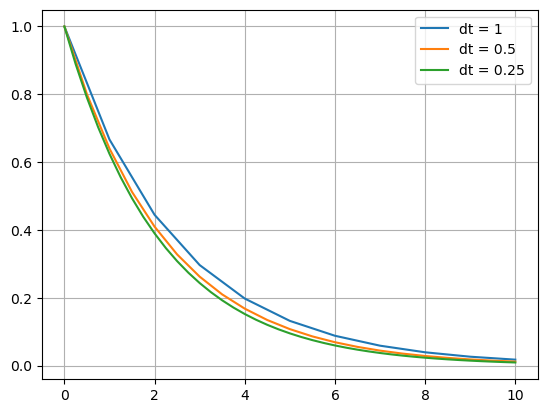

In [24]:
plt.plot(t1, y1, label = 'dt = 1')
plt.plot(t2, y2, label = 'dt = 0.5')
plt.plot(t3, y3, label = 'dt = 0.25')
plt.legend()
plt.grid()

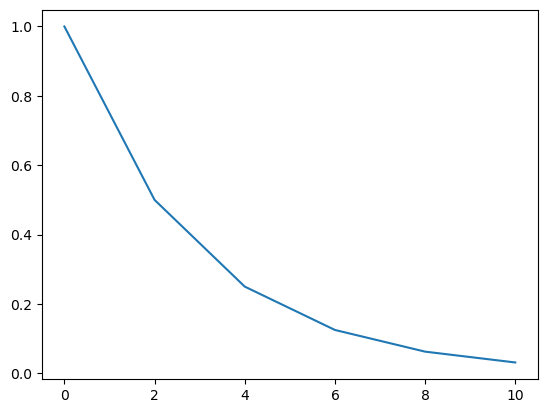

In [41]:
# unstable한 영역
t4, y4 = Euler_back(t0=0, y0=1, tmax=10, dt=2)
plt.plot(t4, y4, label = 'dt = 4')

#### Trapezoid method 
idea : y' 적분 --> y

In [43]:
# Trapezoid method

def Trap(t0, y0, tmax, dt):
    n = int((tmax - t0)/dt) + 1
    t = np.arange(t0, tmax+dt, dt)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i] * ((1 + (-0.5)*dt*0.5)/(1 - (-0.5)*dt*0.5))

    return t, y

In [44]:
t1, y1 = Trap(t0 = 0, y0=1, tmax=10, dt=1)
t2, y2 = Trap(t0 = 0, y0=1, tmax=10, dt=0.5)
t3, y3 = Trap(t0 = 0, y0=1, tmax=10, dt=0.25)
t4, y4 = Trap(t0 = 0, y0=1, tmax=10, dt=2)

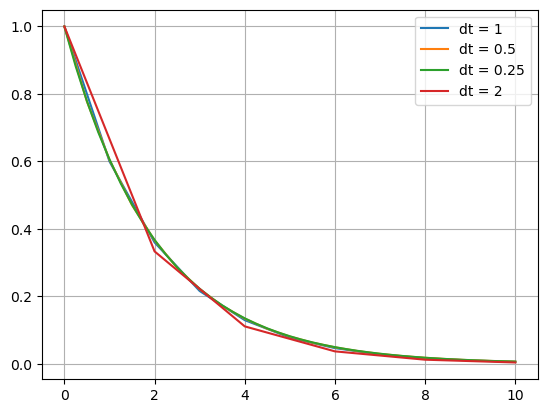

In [45]:
plt.plot(t1, y1, label = 'dt = 1')
plt.plot(t2, y2, label = 'dt = 0.5')
plt.plot(t3, y3, label = 'dt = 0.25')
plt.plot(t4, y4, label = 'dt = 2')
plt.legend()
plt.grid()

#### Runge-Kutta method

k2를 선정하는 방법을 어떻게 하냐 따라서
trapezoidal rule (implicit해서 무조건 root finding 해야한다는 단점이 존재) vs. RK2(y(n) < y < y(n+1)에 놔둬서 explicit해짐)